In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\rakhi\Downloads\student-data.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
df.shape

(395, 31)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There are no null values.

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:ylabel='passed'>

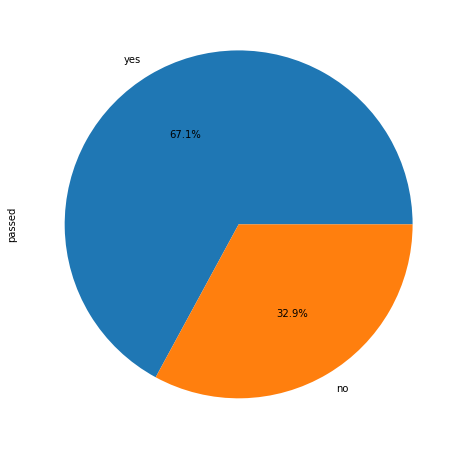

In [9]:
df.passed.value_counts().plot(kind="pie",autopct='%.1f%%',figsize=(8,8))

The pass percentage is 67.1%.

<AxesSubplot:>

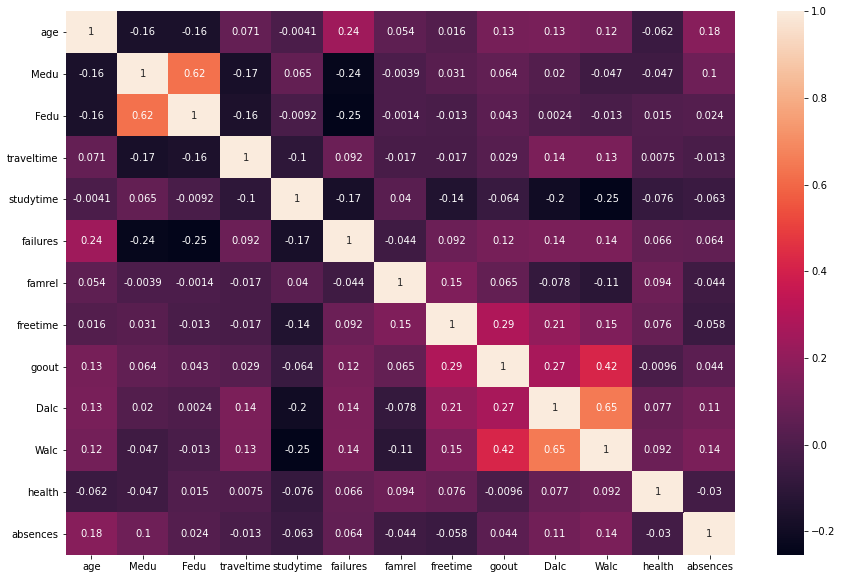

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

## Exploratory analysis

In [11]:
num_col=df._get_numeric_data().columns.tolist()
cat_col =set(df.columns)-set(num_col)

In [12]:
cont_col= {"age","failures","absences"}
numb_col=set(num_col)-cont_col

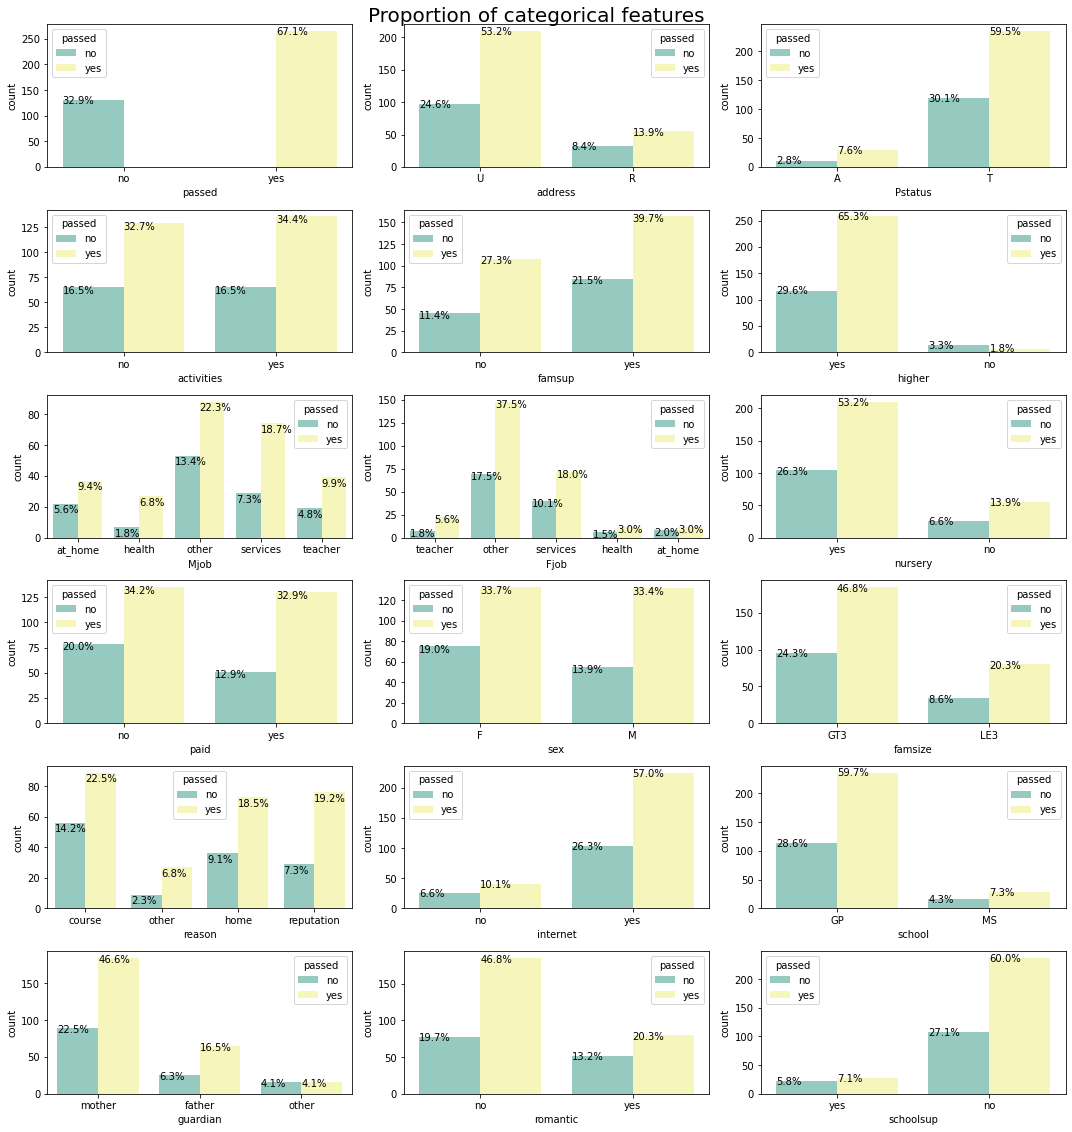

In [13]:
plt.figure(figsize=(15,16))
plt.suptitle("Proportion of categorical features",fontsize=20)
for i, j in enumerate(cat_col):
    plt.subplot(6,3, i+1)
    ax=sns.countplot(df[j],hue=df["passed"],palette="Set3")
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_height()-5.9
        ax.annotate(percentage,(x, y))
plt.tight_layout()

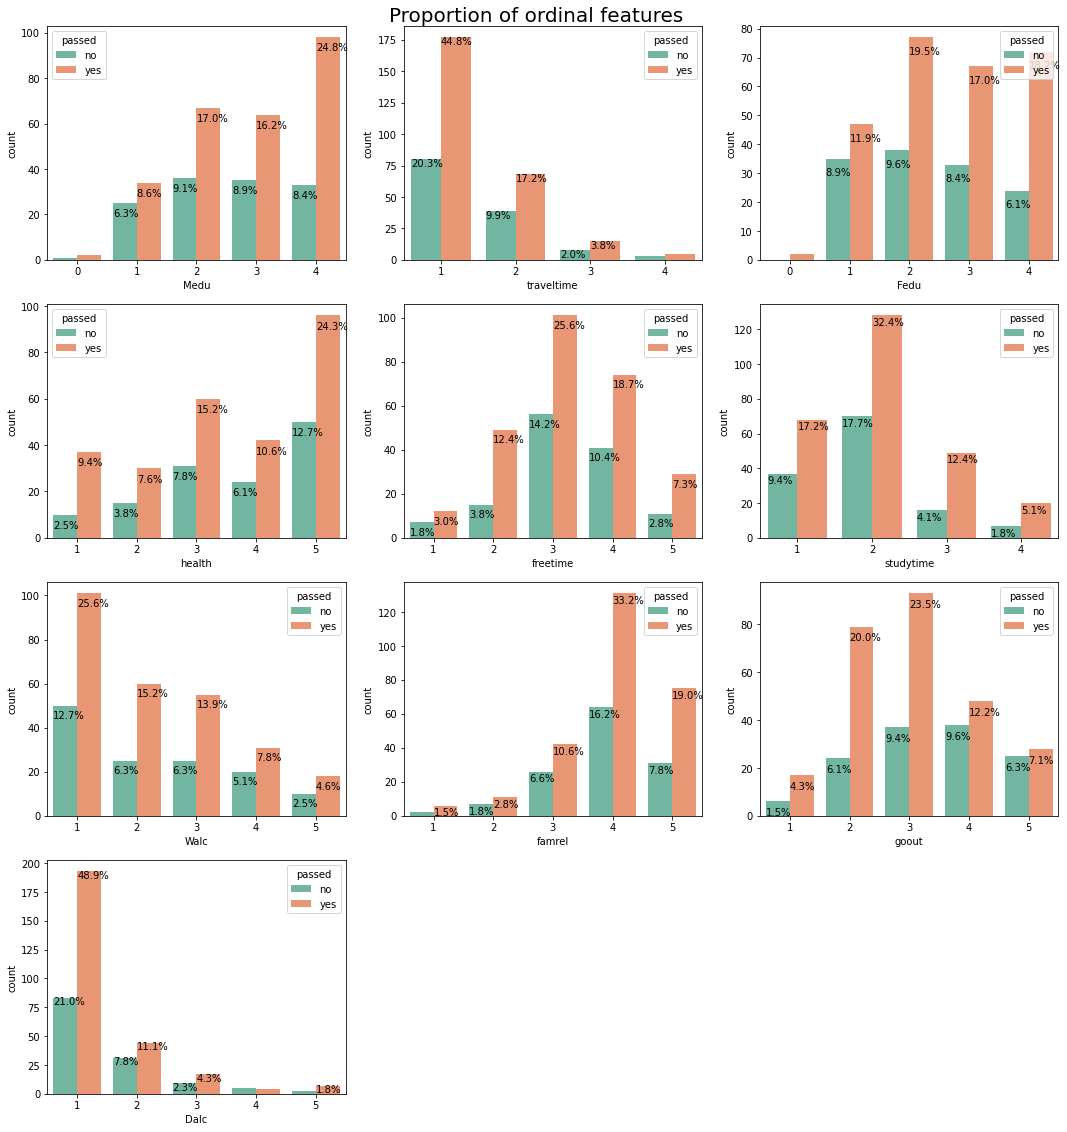

In [14]:
plt.figure(figsize=(15,16))
plt.suptitle("Proportion of ordinal features",fontsize=20)
for i, j in enumerate(numb_col):
    plt.subplot(4,3, i+1)
    ax=sns.countplot(df[j],hue=df["passed"],palette="Set2")
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_height()-5.9
        ax.annotate(percentage,(x, y))
plt.tight_layout()

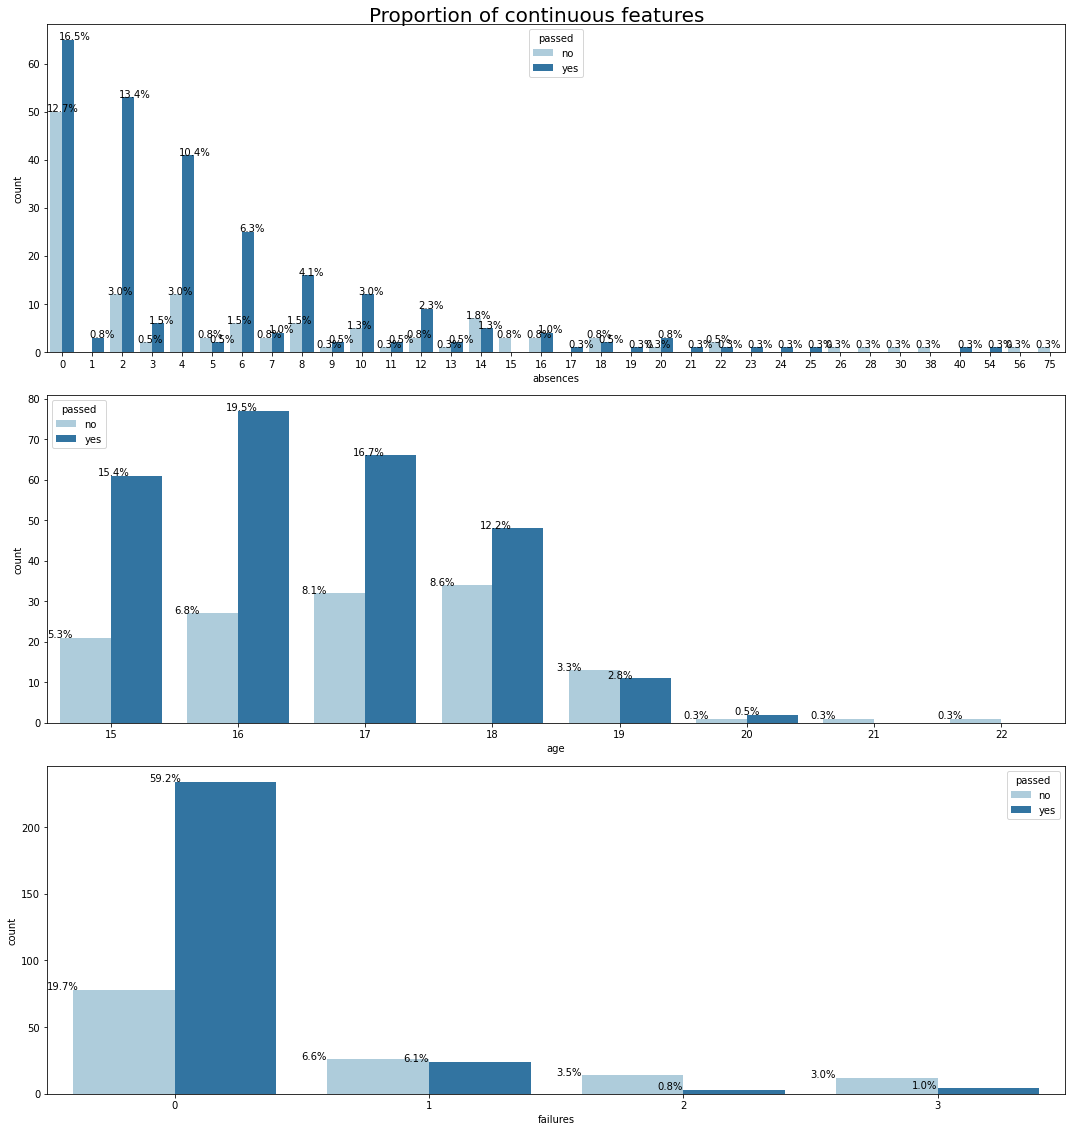

In [15]:
plt.figure(figsize=(15,16))
plt.suptitle("Proportion of continuous features",fontsize=20)
for i, j in enumerate(cont_col):
    plt.subplot(3,1, i+1)
    ax=sns.countplot(df[j],hue=df["passed"],palette="Paired")
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()-0.1
        y = p.get_height()
        ax.annotate(percentage,(x, y))
plt.tight_layout()

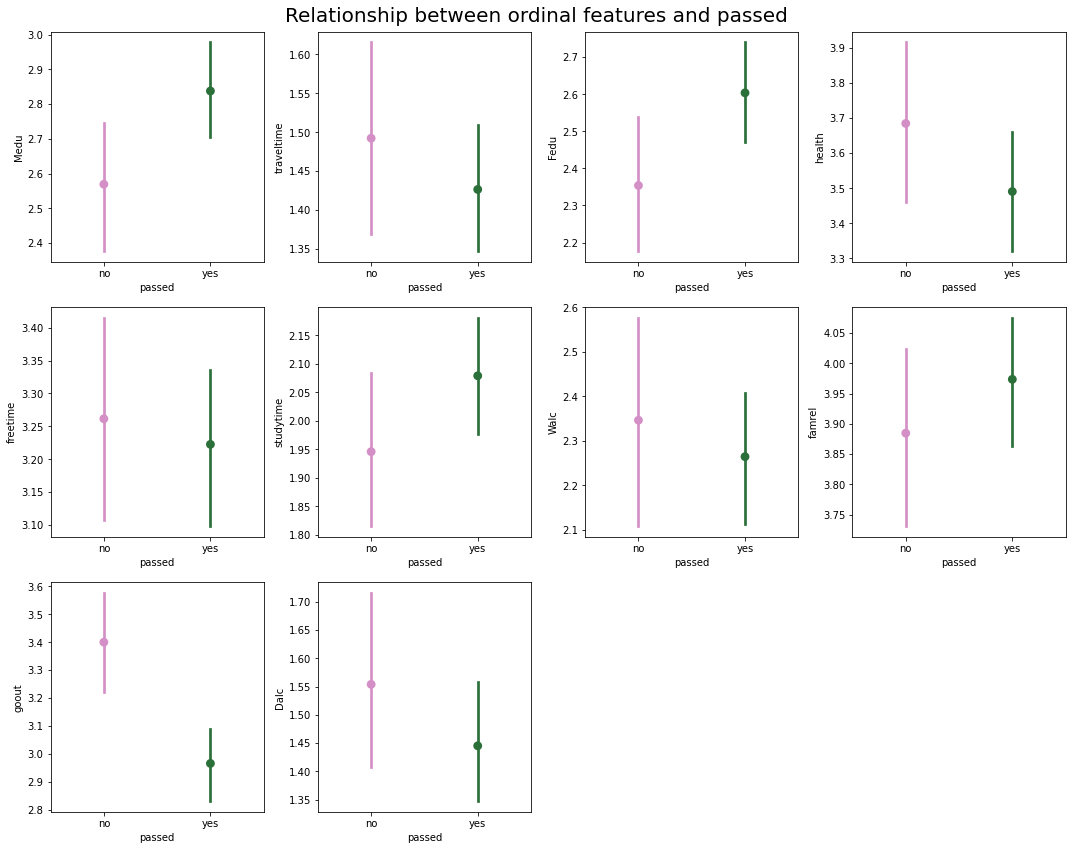

In [16]:
plt.figure(figsize=(15, 12))
plt.suptitle("Relationship between ordinal features and passed",fontsize=20)
for i, j in enumerate(numb_col):
    plt.subplot(3,4, i+1)
    sns.pointplot(y=df[j],x=df["passed"],palette="cubehelix_r")
plt.tight_layout()

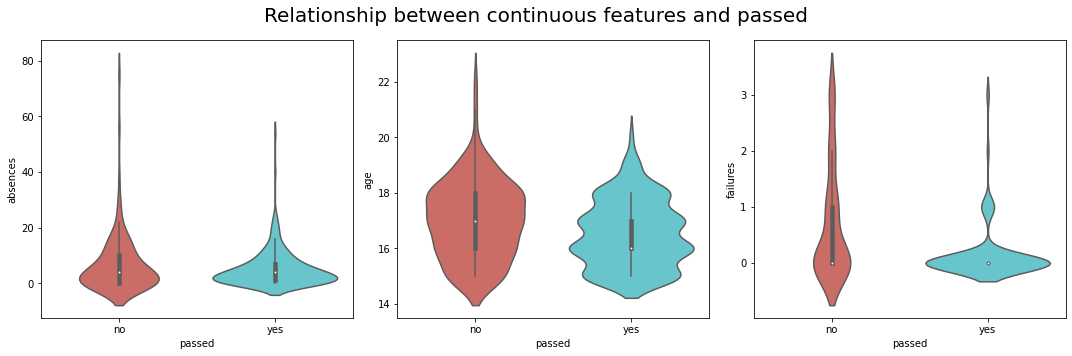

In [17]:
plt.figure(figsize=(15,5))
plt.suptitle("Relationship between continuous features and passed",fontsize=20)
for i, j in enumerate(cont_col):
    plt.subplot(1,3, i+1)
    sns.violinplot(y=df[j],x=df["passed"],palette="hls")
plt.tight_layout()

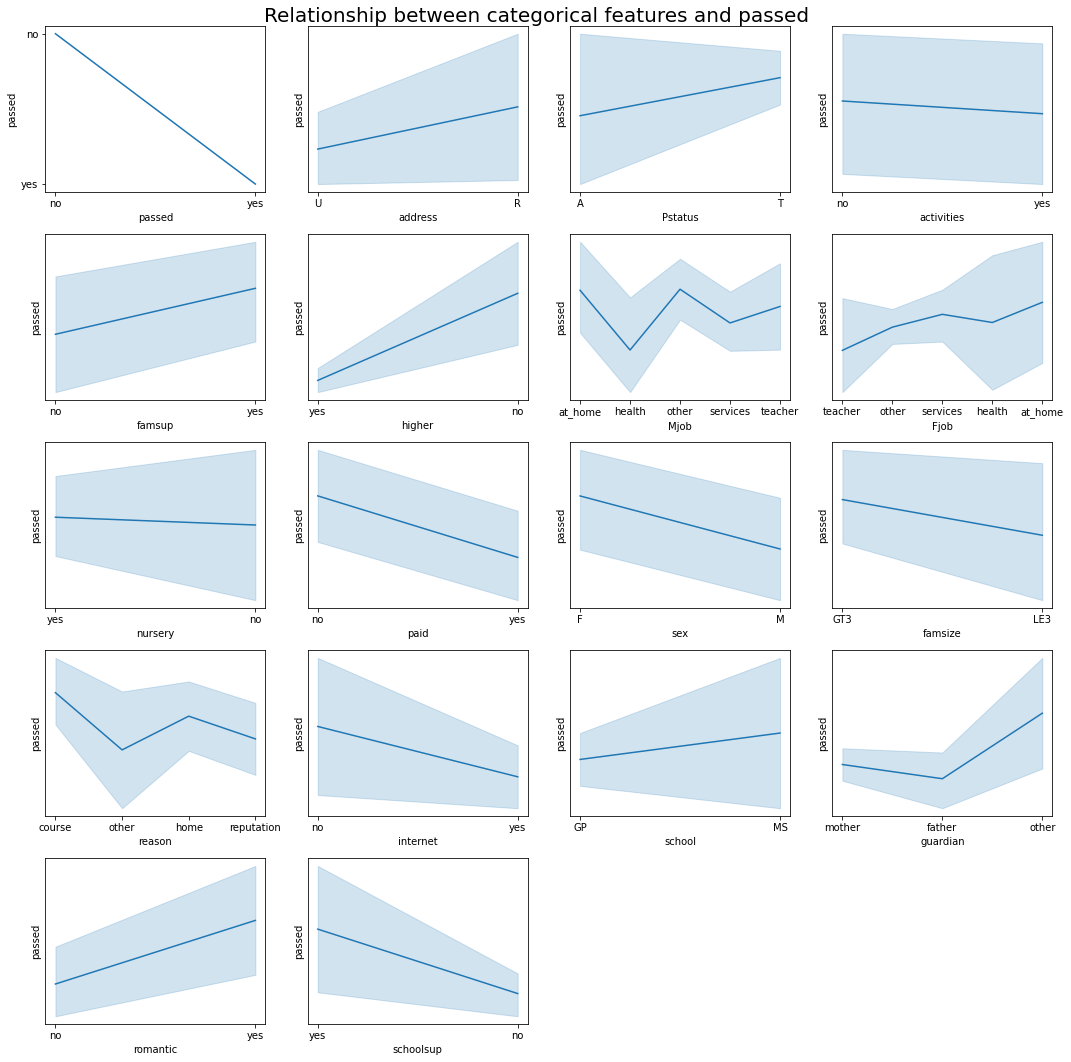

In [18]:
plt.figure(figsize=(15,15))
plt.suptitle("Relationship between categorical features and passed",fontsize=20)
for i, j in enumerate(cat_col):
    plt.subplot(5,4, i+1)
    sns.lineplot(x=df[j],y=df["passed"])
plt.tight_layout()

## Encoding

In [21]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
for i in cat_col:
    df[i] = lb.fit_transform(df[i])

In [22]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,0
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,1
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,0
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,1


## Training and testing data splitting

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
X = df.drop("passed",axis=1)
y = df["passed"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=21)

## Standard scaling

In [25]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred=lg.predict(X_test)

In [28]:
accuracy_score(y_pred,y_test)

0.5822784810126582

In [29]:
precision_score(y_test,y_pred)

0.6333333333333333

In [30]:
recall_score(y_test,y_pred)

0.7755102040816326

In [31]:
f1_score(y_test,y_pred)

0.6972477064220183

In [32]:
confusion_matrix(y_test,y_pred)

array([[ 8, 22],
       [11, 38]], dtype=int64)

## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred=knn.predict(X_test)

In [35]:
accuracy_score(y_pred,y_test)

0.5949367088607594

In [36]:
precision_score(y_test,y_pred)

0.6307692307692307

In [37]:
recall_score(y_test,y_pred)

0.8367346938775511

In [38]:
f1_score(y_test,y_pred)

0.7192982456140352

In [39]:
confusion_matrix(y_test,y_pred)

array([[ 6, 24],
       [ 8, 41]], dtype=int64)

## SVM

In [40]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [41]:
y_pred=sv.predict(X_test)

In [42]:
accuracy_score(y_pred,y_test)

0.6455696202531646

In [43]:
precision_score(y_test,y_pred)

0.6521739130434783

In [44]:
recall_score(y_test,y_pred)

0.9183673469387755

In [45]:
f1_score(y_test,y_pred)

0.7627118644067796

In [46]:
confusion_matrix(y_test,y_pred)

array([[ 6, 24],
       [ 4, 45]], dtype=int64)

## Decision tree¶

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred=dtc.predict(X_test)

In [49]:
accuracy_score(y_pred,y_test)

0.620253164556962

In [50]:
precision_score(y_test,y_pred)

0.6727272727272727

In [51]:
recall_score(y_test,y_pred)

0.7551020408163265

In [52]:
f1_score(y_test,y_pred)

0.7115384615384616

In [53]:
confusion_matrix(y_test,y_pred)

array([[12, 18],
       [12, 37]], dtype=int64)

## Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred=rc.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.6075949367088608

In [57]:
precision_score(y_test,y_pred)

0.6363636363636364

In [58]:
recall_score(y_test,y_pred)

0.8571428571428571

In [59]:
f1_score(y_test,y_pred)

0.7304347826086957

In [60]:
confusion_matrix(y_pred,y_test)

array([[ 6,  7],
       [24, 42]], dtype=int64)

Based on the tested models SVM model shows better results in terms of f1 score, accuracy and precision score